In [26]:
import os
import keras
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import random
from keras.applications.vgg16 import VGG16
from keras.callbacks import EarlyStopping
from PIL import Image
from keras.optimizers import Adam
import tensorflow as tf

## Import images

In [2]:
img_loc ='/Users/Dataset/FaceMask'
categories = ['without_mask','with_mask']

###### Exracting images

In [3]:
images =[]
i=0
for category in categories:
    img_path = os.path.join(img_loc,category)
    labels = categories.index(category)
    for img in os.listdir(img_path):
        i+=1
        print(img)
        img = os.path.join(img_path,img)
        image = cv2.imread(img)
        try:
            image = cv2.resize(image, (224,224))
            images.append([image, labels])
            print(category,i,image.shape)
        except:
            continue


without_mask_3593.jpg
without_mask 1 (224, 224, 3)
without_mask_2855.jpg
without_mask 2 (224, 224, 3)
without_mask_1384.jpg
without_mask 3 (224, 224, 3)
without_mask_1390.jpg
without_mask 4 (224, 224, 3)
without_mask_2699.jpg
without_mask 5 (224, 224, 3)
without_mask_3587.jpg
without_mask 6 (224, 224, 3)
without_mask_2841.jpg
without_mask 7 (224, 224, 3)
without_mask_2869.jpg
without_mask 8 (224, 224, 3)
without_mask_293.jpg
without_mask 9 (224, 224, 3)
without_mask_287.jpg
without_mask 10 (224, 224, 3)
without_mask_1347.jpg
without_mask 11 (224, 224, 3)
without_mask_3550.jpg
without_mask 12 (224, 224, 3)
without_mask_2896.jpg
without_mask 13 (224, 224, 3)
without_mask_2128.jpg
without_mask 14 (224, 224, 3)
without_mask_3236.jpg
without_mask 15 (224, 224, 3)
without_mask_1421.jpg
without_mask 16 (224, 224, 3)
without_mask_1435.jpg
without_mask 17 (224, 224, 3)
without_mask_3222.jpg
without_mask 18 (224, 224, 3)
without_mask_3544.jpg
without_mask 19 (224, 224, 3)
without_mask_278.jpg
wi

without_mask 295 (224, 224, 3)
without_mask_1152.jpg
without_mask 296 (224, 224, 3)
without_mask_3745.jpg
without_mask 297 (224, 224, 3)
without_mask_3751.jpg
without_mask 298 (224, 224, 3)
without_mask_1146.jpg
without_mask 299 (224, 224, 3)
without_mask_1620.jpg
without_mask 300 (224, 224, 3)
without_mask_3037.jpg
without_mask 301 (224, 224, 3)
without_mask_2329.jpg
without_mask 302 (224, 224, 3)
without_mask_1608.jpg
without_mask 303 (224, 224, 3)
without_mask_723.jpg
without_mask 304 (224, 224, 3)
without_mask_2301.jpg
without_mask 305 (224, 224, 3)
without_mask_2467.jpg
without_mask 306 (224, 224, 3)
without_mask_3779.jpg
without_mask 307 (224, 224, 3)
without_mask_2473.jpg
without_mask 308 (224, 224, 3)
without_mask_737.jpg
without_mask 309 (224, 224, 3)
without_mask_2315.jpg
without_mask 310 (224, 224, 3)
without_mask_1783.jpg
without_mask 311 (224, 224, 3)
without_mask_3194.jpg
without_mask 312 (224, 224, 3)
without_mask_870.jpg
without_mask 313 (224, 224, 3)
without_mask_3180.

without_mask 606 (224, 224, 3)
without_mask_444.jpg
without_mask 607 (224, 224, 3)
without_mask_3378.jpg
without_mask 608 (224, 224, 3)
without_mask_2066.jpg
without_mask 609 (224, 224, 3)
without_mask_1547.jpg
without_mask 610 (224, 224, 3)
without_mask_3350.jpg
without_mask 611 (224, 224, 3)
without_mask_2728.jpg
without_mask 612 (224, 224, 3)
without_mask_3436.jpg
without_mask 613 (224, 224, 3)
without_mask_1221.jpg
without_mask 614 (224, 224, 3)
without_mask_1235.jpg
without_mask 615 (224, 224, 3)
without_mask_3422.jpg
without_mask 616 (224, 224, 3)
without_mask_478.jpg
without_mask 617 (224, 224, 3)
without_mask_3344.jpg
without_mask 618 (224, 224, 3)
without_mask_1553.jpg
without_mask 619 (224, 224, 3)
without_mask_3423.jpg
without_mask 620 (224, 224, 3)
without_mask_1234.jpg
without_mask 621 (224, 224, 3)
without_mask_1552.jpg
without_mask 622 (224, 224, 3)
without_mask_3345.jpg
without_mask 623 (224, 224, 3)
without_mask_479.jpg
without_mask 624 (224, 224, 3)
without_mask_3351.

without_mask 908 (224, 224, 3)
without_mask_2272.jpg
without_mask 909 (224, 224, 3)
without_mask_888.jpg
without_mask 910 (224, 224, 3)
without_mask_2514.jpg
without_mask 911 (224, 224, 3)
without_mask_136.jpg
without_mask 912 (224, 224, 3)
without_mask_2500.jpg
without_mask 913 (224, 224, 3)
without_mask_122.jpg
without_mask 914 (224, 224, 3)
without_mask_1009.jpg
without_mask 915 (224, 224, 3)
without_mask_644.jpg
without_mask 916 (224, 224, 3)
without_mask_3178.jpg
without_mask 917 (224, 224, 3)
without_mask_2266.jpg
without_mask 918 (224, 224, 3)
without_mask_877.jpg
without_mask 919 (224, 224, 3)
without_mask_3193.jpg
without_mask 920 (224, 224, 3)
without_mask_1784.jpg
without_mask 921 (224, 224, 3)
without_mask_1948.jpg
without_mask 922 (224, 224, 3)
without_mask_1790.jpg
without_mask 923 (224, 224, 3)
without_mask_863.jpg
without_mask 924 (224, 224, 3)
without_mask_2299.jpg
without_mask 925 (224, 224, 3)
without_mask_3187.jpg
without_mask 926 (224, 224, 3)
without_mask_1960.jpg

without_mask 1213 (224, 224, 3)
without_mask_226.jpg
without_mask 1214 (224, 224, 3)
without_mask_540.jpg
without_mask 1215 (224, 224, 3)
without_mask_2162.jpg
without_mask 1216 (224, 224, 3)
without_mask_3268.jpg
without_mask 1217 (224, 224, 3)
without_mask_554.jpg
without_mask 1218 (224, 224, 3)
without_mask_2176.jpg
without_mask 1219 (224, 224, 3)
without_mask_2610.jpg
without_mask 1220 (224, 224, 3)
without_mask_232.jpg
without_mask 1221 (224, 224, 3)
without_mask_1319.jpg
without_mask 1222 (224, 224, 3)
without_mask_2638.jpg
without_mask 1223 (224, 224, 3)
without_mask_3526.jpg
without_mask 1224 (224, 224, 3)
without_mask_1331.jpg
without_mask 1225 (224, 224, 3)
without_mask_1457.jpg
without_mask 1226 (224, 224, 3)
without_mask_3240.jpg
without_mask 1227 (224, 224, 3)
without_mask_3254.jpg
without_mask 1228 (224, 224, 3)
without_mask_568.jpg
without_mask 1229 (224, 224, 3)
without_mask_1443.jpg
without_mask 1230 (224, 224, 3)
without_mask_1325.jpg
without_mask 1231 (224, 224, 3)
w

without_mask 1532 (224, 224, 3)
without_mask_3086.jpg
without_mask 1533 (224, 224, 3)
without_mask_1849.jpg
without_mask 1534 (224, 224, 3)
without_mask_1691.jpg
without_mask 1535 (224, 224, 3)
without_mask_1685.jpg
without_mask 1536 (224, 224, 3)
without_mask_976.jpg
without_mask 1537 (224, 224, 3)
without_mask_3092.jpg
without_mask 1538 (224, 224, 3)
without_mask_745.jpg
without_mask 1539 (224, 224, 3)
without_mask_3079.jpg
without_mask 1540 (224, 224, 3)
without_mask_2367.jpg
without_mask 1541 (224, 224, 3)
without_mask_1108.jpg
without_mask 1542 (224, 224, 3)
without_mask_2401.jpg
without_mask 1543 (224, 224, 3)
without_mask_2415.jpg
without_mask 1544 (224, 224, 3)
without_mask_751.jpg
without_mask 1545 (224, 224, 3)
without_mask_989.jpg
without_mask 1546 (224, 224, 3)
without_mask_2373.jpg
without_mask 1547 (224, 224, 3)
without_mask_1652.jpg
without_mask 1548 (224, 224, 3)
without_mask_779.jpg
without_mask 1549 (224, 224, 3)
without_mask_3045.jpg
without_mask 1550 (224, 224, 3)
w

without_mask 1847 (224, 224, 3)
without_mask_1296.jpg
without_mask 1848 (224, 224, 3)
without_mask_3481.jpg
without_mask 1849 (224, 224, 3)
without_mask_2947.jpg
without_mask 1850 (224, 224, 3)
without_mask_3495.jpg
without_mask 1851 (224, 224, 3)
without_mask_2953.jpg
without_mask 1852 (224, 224, 3)
without_mask_1282.jpg
without_mask 1853 (224, 224, 3)
without_mask_1269.jpg
without_mask 1854 (224, 224, 3)
without_mask_2760.jpg
without_mask 1855 (224, 224, 3)
without_mask_342.jpg
without_mask 1856 (224, 224, 3)
without_mask_424.jpg
without_mask 1857 (224, 224, 3)
without_mask_3318.jpg
without_mask 1858 (224, 224, 3)
without_mask_2006.jpg
without_mask 1859 (224, 224, 3)
without_mask_94.jpg
without_mask 1860 (224, 224, 3)
without_mask_80.jpg
without_mask 1861 (224, 224, 3)
without_mask_430.jpg
without_mask 1862 (224, 224, 3)
without_mask_2012.jpg
without_mask 1863 (224, 224, 3)
without_mask_2774.jpg
without_mask 1864 (224, 224, 3)
without_mask_356.jpg
without_mask 1865 (224, 224, 3)
with

without_mask 2174 (224, 224, 3)
without_mask_763.jpg
without_mask 2175 (224, 224, 3)
without_mask_1890.jpg
without_mask 2176 (224, 224, 3)
without_mask_1648.jpg
without_mask 2177 (224, 224, 3)
without_mask_3739.jpg
without_mask 2178 (224, 224, 3)
without_mask_2427.jpg
without_mask 2179 (224, 224, 3)
without_mask_2433.jpg
without_mask 2180 (224, 224, 3)
without_mask_1884.jpg
without_mask 2181 (224, 224, 3)
without_mask_2355.jpg
without_mask 2182 (224, 224, 3)
without_mask_777.jpg
without_mask 2183 (224, 224, 3)
without_mask_1674.jpg
without_mask 2184 (224, 224, 3)
without_mask_987.jpg
without_mask 2185 (224, 224, 3)
without_mask_3063.jpg
without_mask 2186 (224, 224, 3)
without_mask_3705.jpg
without_mask 2187 (224, 224, 3)
without_mask_1112.jpg
without_mask 2188 (224, 224, 3)
without_mask_1106.jpg
without_mask 2189 (224, 224, 3)
without_mask_3711.jpg
without_mask 2190 (224, 224, 3)
without_mask_2369.jpg
without_mask 2191 (224, 224, 3)
without_mask_993.jpg
without_mask 2192 (224, 224, 3)


without_mask 2497 (224, 224, 3)
without_mask_3058.jpg
without_mask 2498 (224, 224, 3)
without_mask_2346.jpg
without_mask 2499 (224, 224, 3)
without_mask_2420.jpg
without_mask 2500 (224, 224, 3)
without_mask_1129.jpg
without_mask 2501 (224, 224, 3)
without_mask_2434.jpg
without_mask 2502 (224, 224, 3)
without_mask_770.jpg
without_mask 2503 (224, 224, 3)
without_mask_2352.jpg
without_mask 2504 (224, 224, 3)
without_mask_1883.jpg
without_mask 2505 (224, 224, 3)
without_mask_758.jpg
without_mask 2506 (224, 224, 3)
without_mask_3064.jpg
without_mask 2507 (224, 224, 3)
without_mask_980.jpg
without_mask 2508 (224, 224, 3)
without_mask_1673.jpg
without_mask 2509 (224, 224, 3)
without_mask_1115.jpg
without_mask 2510 (224, 224, 3)
without_mask_3702.jpg
without_mask 2511 (224, 224, 3)
without_mask_2408.jpg
without_mask 2512 (224, 224, 3)
without_mask_3716.jpg
without_mask 2513 (224, 224, 3)
without_mask_1101.jpg
without_mask 2514 (224, 224, 3)
without_mask_7.jpg
without_mask 2515 (224, 224, 3)
wi

without_mask 2822 (224, 224, 3)
without_mask_2998.jpg
without_mask 2823 (224, 224, 3)
without_mask_362.jpg
without_mask 2824 (224, 224, 3)
without_mask_2740.jpg
without_mask 2825 (224, 224, 3)
without_mask_2026.jpg
without_mask 2826 (224, 224, 3)
without_mask_3338.jpg
without_mask 2827 (224, 224, 3)
without_mask_404.jpg
without_mask 2828 (224, 224, 3)
without_mask_389.jpg
without_mask 2829 (224, 224, 3)
without_mask_2973.jpg
without_mask 2830 (224, 224, 3)
without_mask_2967.jpg
without_mask 2831 (224, 224, 3)
without_mask_63.jpg
without_mask 2832 (224, 224, 3)
without_mask_2797.jpg
without_mask 2833 (224, 224, 3)
without_mask_3489.jpg
without_mask 2834 (224, 224, 3)
without_mask_2783.jpg
without_mask 2835 (224, 224, 3)
without_mask_77.jpg
without_mask 2836 (224, 224, 3)
without_mask_3674.jpg
without_mask 2837 (224, 224, 3)
without_mask_148.jpg
without_mask 2838 (224, 224, 3)
without_mask_1063.jpg
without_mask 2839 (224, 224, 3)
without_mask_1705.jpg
without_mask 2840 (224, 224, 3)
with

without_mask 3136 (224, 224, 3)
without_mask_258.jpg
without_mask 3137 (224, 224, 3)
without_mask_3564.jpg
without_mask 3138 (224, 224, 3)
without_mask_1373.jpg
without_mask 3139 (224, 224, 3)
without_mask_1367.jpg
without_mask 3140 (224, 224, 3)
without_mask_3570.jpg
without_mask 3141 (224, 224, 3)
without_mask_3216.jpg
without_mask 3142 (224, 224, 3)
without_mask_2108.jpg
without_mask 3143 (224, 224, 3)
without_mask_1401.jpg
without_mask 3144 (224, 224, 3)
without_mask_2685.jpg
without_mask 3145 (224, 224, 3)
without_mask_1398.jpg
without_mask 3146 (224, 224, 3)
without_mask_2849.jpg
without_mask 3147 (224, 224, 3)
without_mask_2691.jpg
without_mask 3148 (224, 224, 3)
without_mask_2861.jpg
without_mask 3149 (224, 224, 3)
without_mask_2875.jpg
without_mask 3150 (224, 224, 3)
without_mask_2863.jpg
without_mask 3151 (224, 224, 3)
without_mask_299.jpg
without_mask 3152 (224, 224, 3)
without_mask_2877.jpg
without_mask 3153 (224, 224, 3)
without_mask_2687.jpg
without_mask 3154 (224, 224, 3

without_mask 3415 (224, 224, 3)
without_mask_2457.jpg
without_mask 3416 (224, 224, 3)
without_mask_3749.jpg
without_mask 3417 (224, 224, 3)
without_mask_3761.jpg
without_mask 3418 (224, 224, 3)
without_mask_1176.jpg
without_mask 3419 (224, 224, 3)
without_mask_1610.jpg
without_mask 3420 (224, 224, 3)
without_mask_3007.jpg
without_mask 3421 (224, 224, 3)
without_mask_2319.jpg
without_mask 3422 (224, 224, 3)
without_mask_3013.jpg
without_mask 3423 (224, 224, 3)
without_mask_1604.jpg
without_mask 3424 (224, 224, 3)
without_mask_1162.jpg
without_mask 3425 (224, 224, 3)
without_mask_3775.jpg
without_mask 3426 (224, 224, 3)
without_mask_1943.jpg
without_mask 3427 (224, 224, 3)
without_mask_2292.jpg
without_mask 3428 (224, 224, 3)
without_mask_868.jpg
without_mask 3429 (224, 224, 3)
without_mask_3198.jpg
without_mask 3430 (224, 224, 3)
without_mask_2286.jpg
without_mask 3431 (224, 224, 3)
without_mask_1957.jpg
without_mask 3432 (224, 224, 3)
without_mask_3826.jpg
without_mask 3433 (224, 224, 

without_mask 3710 (224, 224, 3)
without_mask_328.jpg
without_mask 3711 (224, 224, 3)
without_mask_3372.jpg
without_mask 3712 (224, 224, 3)
without_mask_1565.jpg
without_mask 3713 (224, 224, 3)
without_mask_329.jpg
without_mask 3714 (224, 224, 3)
without_mask_3415.jpg
without_mask 3715 (224, 224, 3)
without_mask_1202.jpg
without_mask 3716 (224, 224, 3)
without_mask_1564.jpg
without_mask 3717 (224, 224, 3)
without_mask_3373.jpg
without_mask 3718 (224, 224, 3)
without_mask_2079.jpg
without_mask 3719 (224, 224, 3)
without_mask_3367.jpg
without_mask 3720 (224, 224, 3)
without_mask_1570.jpg
without_mask 3721 (224, 224, 3)
without_mask_1216.jpg
without_mask 3722 (224, 224, 3)
without_mask_3401.jpg
without_mask 3723 (224, 224, 3)
without_mask_315.jpg
without_mask 3724 (224, 224, 3)
without_mask_3429.jpg
without_mask 3725 (224, 224, 3)
without_mask_2737.jpg
without_mask 3726 (224, 224, 3)
without_mask_2051.jpg
without_mask 3727 (224, 224, 3)
without_mask_473.jpg
without_mask 3728 (224, 224, 3)


with_mask 3893 (224, 224, 3)
with_mask_2236.jpg
with_mask 3894 (224, 224, 3)
with_mask_2222.jpg
with_mask 3895 (224, 224, 3)
with_mask_2544.jpg
with_mask 3896 (224, 224, 3)
with_mask_1065.jpg
with_mask 3897 (224, 224, 3)
with_mask_3672.jpg
with_mask 3898 (224, 224, 3)
with_mask_3114.jpg
with_mask 3899 (224, 224, 3)
with_mask_1703.jpg
with_mask 3900 (224, 224, 3)
with_mask_1717.jpg
with_mask 3901 (224, 224, 3)
with_mask_3100.jpg
with_mask 3902 (224, 224, 3)
with_mask_2578.jpg
with_mask 3903 (224, 224, 3)
with_mask_3666.jpg
with_mask 3904 (224, 224, 3)
with_mask_1071.jpg
with_mask 3905 (224, 224, 3)
with_mask_2593.jpg
with_mask 3906 (224, 224, 3)
with_mask_349.jpg
with_mask 3907 (224, 224, 3)
with_mask_1924.jpg
with_mask 3908 (224, 224, 3)
with_mask_1930.jpg
with_mask 3909 (224, 224, 3)
with_mask_3699.jpg
with_mask 3910 (224, 224, 3)
with_mask_2587.jpg
with_mask 3911 (224, 224, 3)
with_mask_413.jpg
with_mask 3912 (224, 224, 3)
with_mask_1918.jpg
with_mask 3913 (224, 224, 3)
with_mask_375

with_mask 4165 (224, 224, 3)
with_mask_2786.jpg
with_mask 4166 (224, 224, 3)
with_mask_3498.jpg
with_mask 4167 (224, 224, 3)
with_mask_2792.jpg
with_mask 4168 (224, 224, 3)
with_mask_148.jpg
with_mask 4169 (224, 224, 3)
with_mask_160.jpg
with_mask 4170 (224, 224, 3)
with_mask_606.jpg
with_mask 4171 (224, 224, 3)
with_mask_2962.jpg
with_mask 4172 (224, 224, 3)
with_mask_612.jpg
with_mask 4173 (224, 224, 3)
with_mask_2976.jpg
with_mask 4174 (224, 224, 3)
with_mask_174.jpg
with_mask 4175 (224, 224, 3)
with_mask_2977.jpg
with_mask 4176 (224, 224, 3)
with_mask_613.jpg
with_mask 4177 (224, 224, 3)
with_mask_175.jpg
with_mask 4178 (224, 224, 3)
with_mask_161.jpg
with_mask 4179 (224, 224, 3)
with_mask_2963.jpg
with_mask 4180 (224, 224, 3)
with_mask_607.jpg
with_mask 4181 (224, 224, 3)
with_mask_2793.jpg
with_mask 4182 (224, 224, 3)
with_mask_149.jpg
with_mask 4183 (224, 224, 3)
with_mask_3499.jpg
with_mask 4184 (224, 224, 3)
with_mask_2787.jpg
with_mask 4185 (224, 224, 3)
with_mask_1265.jpg
wi

with_mask 4514 (224, 224, 3)
with_mask_3271.jpg
with_mask 4515 (224, 224, 3)
with_mask_3501.jpg
with_mask 4516 (224, 224, 3)
with_mask_1316.jpg
with_mask 4517 (224, 224, 3)
with_mask_1470.jpg
with_mask 4518 (224, 224, 3)
with_mask_3267.jpg
with_mask 4519 (224, 224, 3)
with_mask_2179.jpg
with_mask 4520 (224, 224, 3)
with_mask_3273.jpg
with_mask 4521 (224, 224, 3)
with_mask_1464.jpg
with_mask 4522 (224, 224, 3)
with_mask_1302.jpg
with_mask 4523 (224, 224, 3)
with_mask_3515.jpg
with_mask 4524 (224, 224, 3)
with_mask_2623.jpg
with_mask 4525 (224, 224, 3)
with_mask_947.jpg
with_mask 4526 (224, 224, 3)
with_mask_2145.jpg
with_mask 4527 (224, 224, 3)
with_mask_1458.jpg
with_mask 4528 (224, 224, 3)
with_mask_2151.jpg
with_mask 4529 (224, 224, 3)
with_mask_2637.jpg
with_mask 4530 (224, 224, 3)
with_mask_3529.jpg
with_mask 4531 (224, 224, 3)
with_mask_953.jpg
with_mask 4532 (224, 224, 3)
with_mask_2804.jpg
with_mask 4533 (224, 224, 3)
with_mask_760.jpg
with_mask 4534 (224, 224, 3)
with_mask_2810

with_mask 4753 (224, 224, 3)
with_mask_2137.jpg
with_mask 4754 (224, 224, 3)
with_mask_1358.jpg
with_mask 4755 (224, 224, 3)
with_mask_2651.jpg
with_mask 4756 (224, 224, 3)
with_mask_935.jpg
with_mask 4757 (224, 224, 3)
with_mask_2889.jpg
with_mask 4758 (224, 224, 3)
with_mask_1370.jpg
with_mask 4759 (224, 224, 3)
with_mask_2679.jpg
with_mask 4760 (224, 224, 3)
with_mask_3567.jpg
with_mask 4761 (224, 224, 3)
with_mask_3201.jpg
with_mask 4762 (224, 224, 3)
with_mask_1416.jpg
with_mask 4763 (224, 224, 3)
with_mask_1402.jpg
with_mask 4764 (224, 224, 3)
with_mask_3215.jpg
with_mask 4765 (224, 224, 3)
with_mask_909.jpg
with_mask 4766 (224, 224, 3)
with_mask_3573.jpg
with_mask 4767 (224, 224, 3)
with_mask_1364.jpg
with_mask 4768 (224, 224, 3)
with_mask_3598.jpg
with_mask 4769 (224, 224, 3)
with_mask_2686.jpg
with_mask 4770 (224, 224, 3)
with_mask_2692.jpg
with_mask 4771 (224, 224, 3)
with_mask_2862.jpg
with_mask 4772 (224, 224, 3)
with_mask_706.jpg
with_mask 4773 (224, 224, 3)
with_mask_2876

with_mask 5073 (224, 224, 3)
with_mask_665.jpg
with_mask 5074 (224, 224, 3)
with_mask_2901.jpg
with_mask 5075 (224, 224, 3)
with_mask_103.jpg
with_mask 5076 (224, 224, 3)
with_mask_117.jpg
with_mask 5077 (224, 224, 3)
with_mask_671.jpg
with_mask 5078 (224, 224, 3)
with_mask_2915.jpg
with_mask 5079 (224, 224, 3)
with_mask_116.jpg
with_mask 5080 (224, 224, 3)
with_mask_2914.jpg
with_mask 5081 (224, 224, 3)
with_mask_670.jpg
with_mask 5082 (224, 224, 3)
with_mask_2900.jpg
with_mask 5083 (224, 224, 3)
with_mask_664.jpg
with_mask 5084 (224, 224, 3)
with_mask_102.jpg
with_mask 5085 (224, 224, 3)
with_mask_2096.jpg
with_mask 5086 (224, 224, 3)
with_mask_3388.jpg
with_mask 5087 (224, 224, 3)
with_mask_894.jpg
with_mask 5088 (224, 224, 3)
with_mask_2928.jpg
with_mask 5089 (224, 224, 3)
with_mask_880.jpg
with_mask 5090 (224, 224, 3)
with_mask_658.jpg
with_mask 5091 (224, 224, 3)
with_mask_2082.jpg
with_mask 5092 (224, 224, 3)
with_mask_1560.jpg
with_mask 5093 (224, 224, 3)
with_mask_3377.jpg
wit

with_mask 5325 (224, 224, 3)
with_mask_3366.jpg
with_mask 5326 (224, 224, 3)
with_mask_2078.jpg
with_mask 5327 (224, 224, 3)
with_mask_1571.jpg
with_mask 5328 (224, 224, 3)
with_mask_1217.jpg
with_mask 5329 (224, 224, 3)
with_mask_3400.jpg
with_mask 5330 (224, 224, 3)
with_mask_2291.jpg
with_mask 5331 (224, 224, 3)
with_mask_1798.jpg
with_mask 5332 (224, 224, 3)
with_mask_1940.jpg
with_mask 5333 (224, 224, 3)
with_mask_1954.jpg
with_mask 5334 (224, 224, 3)
with_mask_2285.jpg
with_mask 5335 (224, 224, 3)
with_mask_339.jpg
with_mask 5336 (224, 224, 3)
with_mask_311.jpg
with_mask 5337 (224, 224, 3)
with_mask_477.jpg
with_mask 5338 (224, 224, 3)
with_mask_463.jpg
with_mask 5339 (224, 224, 3)
with_mask_305.jpg
with_mask 5340 (224, 224, 3)
with_mask_1968.jpg
with_mask 5341 (224, 224, 3)
with_mask_1983.jpg
with_mask 5342 (224, 224, 3)
with_mask_2252.jpg
with_mask 5343 (224, 224, 3)
with_mask_2534.jpg
with_mask 5344 (224, 224, 3)
with_mask_488.jpg
with_mask 5345 (224, 224, 3)
with_mask_1029.jp

with_mask 5619 (224, 224, 3)
with_mask_1360.jpg
with_mask 5620 (224, 224, 3)
with_mask_3577.jpg
with_mask 5621 (224, 224, 3)
with_mask_2669.jpg
with_mask 5622 (224, 224, 3)
with_mask_3211.jpg
with_mask 5623 (224, 224, 3)
with_mask_1406.jpg
with_mask 5624 (224, 224, 3)
with_mask_1412.jpg
with_mask 5625 (224, 224, 3)
with_mask_3205.jpg
with_mask 5626 (224, 224, 3)
with_mask_919.jpg
with_mask 5627 (224, 224, 3)
with_mask_3563.jpg
with_mask 5628 (224, 224, 3)
with_mask_1374.jpg
with_mask 5629 (224, 224, 3)
with_mask_2664.jpg
with_mask 5630 (224, 224, 3)
with_mask_900.jpg
with_mask 5631 (224, 224, 3)
with_mask_2102.jpg
with_mask 5632 (224, 224, 3)
with_mask_3208.jpg
with_mask 5633 (224, 224, 3)
with_mask_2116.jpg
with_mask 5634 (224, 224, 3)
with_mask_2670.jpg
with_mask 5635 (224, 224, 3)
with_mask_914.jpg
with_mask 5636 (224, 224, 3)
with_mask_1379.jpg
with_mask 5637 (224, 224, 3)
with_mask_2658.jpg
with_mask 5638 (224, 224, 3)
with_mask_2880.jpg
with_mask 5639 (224, 224, 3)
with_mask_3546

with_mask 5852 (224, 224, 3)
with_mask_1378.jpg
with_mask 5853 (224, 224, 3)
with_mask_915.jpg
with_mask 5854 (224, 224, 3)
with_mask_2671.jpg
with_mask 5855 (224, 224, 3)
with_mask_901.jpg
with_mask 5856 (224, 224, 3)
with_mask_2665.jpg
with_mask 5857 (224, 224, 3)
with_mask_2103.jpg
with_mask 5858 (224, 224, 3)
with_mask_2673.jpg
with_mask 5859 (224, 224, 3)
with_mask_917.jpg
with_mask 5860 (224, 224, 3)
with_mask_2115.jpg
with_mask 5861 (224, 224, 3)
with_mask_2101.jpg
with_mask 5862 (224, 224, 3)
with_mask_1408.jpg
with_mask 5863 (224, 224, 3)
with_mask_2667.jpg
with_mask 5864 (224, 224, 3)
with_mask_903.jpg
with_mask 5865 (224, 224, 3)
with_mask_3579.jpg
with_mask 5866 (224, 224, 3)
with_mask_1346.jpg
with_mask 5867 (224, 224, 3)
with_mask_2897.jpg
with_mask 5868 (224, 224, 3)
with_mask_3551.jpg
with_mask 5869 (224, 224, 3)
with_mask_3237.jpg
with_mask 5870 (224, 224, 3)
with_mask_2129.jpg
with_mask 5871 (224, 224, 3)
with_mask_1420.jpg
with_mask 5872 (224, 224, 3)
with_mask_1434.

with_mask 6099 (224, 224, 3)
with_mask_1425.jpg
with_mask 6100 (224, 224, 3)
with_mask_1343.jpg
with_mask 6101 (224, 224, 3)
with_mask_3554.jpg
with_mask 6102 (224, 224, 3)
with_mask_2892.jpg
with_mask 6103 (224, 224, 3)
with_mask_3540.jpg
with_mask 6104 (224, 224, 3)
with_mask_2886.jpg
with_mask 6105 (224, 224, 3)
with_mask_1357.jpg
with_mask 6106 (224, 224, 3)
with_mask_1431.jpg
with_mask 6107 (224, 224, 3)
with_mask_3226.jpg
with_mask 6108 (224, 224, 3)
with_mask_2138.jpg
with_mask 6109 (224, 224, 3)
with_mask_1419.jpg
with_mask 6110 (224, 224, 3)
with_mask_2110.jpg
with_mask 6111 (224, 224, 3)
with_mask_2676.jpg
with_mask 6112 (224, 224, 3)
with_mask_3568.jpg
with_mask 6113 (224, 224, 3)
with_mask_912.jpg
with_mask 6114 (224, 224, 3)
with_mask_2662.jpg
with_mask 6115 (224, 224, 3)
with_mask_906.jpg
with_mask 6116 (224, 224, 3)
with_mask_2104.jpg
with_mask 6117 (224, 224, 3)
with_mask_3597.jpg
with_mask 6118 (224, 224, 3)
with_mask_2851.jpg
with_mask 6119 (224, 224, 3)
with_mask_735

with_mask 6399 (224, 224, 3)
with_mask_2259.jpg
with_mask 6400 (224, 224, 3)
with_mask_483.jpg
with_mask 6401 (224, 224, 3)
with_mask_3621.jpg
with_mask 6402 (224, 224, 3)
with_mask_1036.jpg
with_mask 6403 (224, 224, 3)
with_mask_2517.jpg
with_mask 6404 (224, 224, 3)
with_mask_3609.jpg
with_mask 6405 (224, 224, 3)
with_mask_1778.jpg
with_mask 6406 (224, 224, 3)
with_mask_2271.jpg
with_mask 6407 (224, 224, 3)
with_mask_2265.jpg
with_mask 6408 (224, 224, 3)
with_mask_2503.jpg
with_mask 6409 (224, 224, 3)
with_mask_454.jpg
with_mask 6410 (224, 224, 3)
with_mask_1787.jpg
with_mask 6411 (224, 224, 3)
with_mask_332.jpg
with_mask 6412 (224, 224, 3)
with_mask_3190.jpg
with_mask 6413 (224, 224, 3)
with_mask_326.jpg
with_mask 6414 (224, 224, 3)
with_mask_3184.jpg
with_mask 6415 (224, 224, 3)
with_mask_1793.jpg
with_mask 6416 (224, 224, 3)
with_mask_440.jpg
with_mask 6417 (224, 224, 3)
with_mask_468.jpg
with_mask 6418 (224, 224, 3)
with_mask_1963.jpg
with_mask 6419 (224, 224, 3)
with_mask_1977.jp

with_mask 6641 (224, 224, 3)
with_mask_383.jpg
with_mask 6642 (224, 224, 3)
with_mask_1736.jpg
with_mask 6643 (224, 224, 3)
with_mask_1050.jpg
with_mask 6644 (224, 224, 3)
with_mask_2559.jpg
with_mask 6645 (224, 224, 3)
with_mask_3647.jpg
with_mask 6646 (224, 224, 3)
with_mask_1905.jpg
with_mask 6647 (224, 224, 3)
with_mask_368.jpg
with_mask 6648 (224, 224, 3)
with_mask_1911.jpg
with_mask 6649 (224, 224, 3)
with_mask_1087.jpg
with_mask 6650 (224, 224, 3)
with_mask_3690.jpg
with_mask 6651 (224, 224, 3)
with_mask_432.jpg
with_mask 6652 (224, 224, 3)
with_mask_354.jpg
with_mask 6653 (224, 224, 3)
with_mask_1939.jpg
with_mask 6654 (224, 224, 3)
with_mask_340.jpg
with_mask 6655 (224, 224, 3)
with_mask_3684.jpg
with_mask 6656 (224, 224, 3)
with_mask_426.jpg
with_mask 6657 (224, 224, 3)
with_mask_1093.jpg
with_mask 6658 (224, 224, 3)
with_mask_2015.jpg
with_mask 6659 (224, 224, 3)
with_mask_817.jpg
with_mask 6660 (224, 224, 3)
with_mask_2773.jpg
with_mask 6661 (224, 224, 3)
with_mask_3479.jpg

with_mask 6814 (224, 224, 3)
with_mask_962.jpg
with_mask 6815 (224, 224, 3)
with_mask_2606.jpg
with_mask 6816 (224, 224, 3)
with_mask_3268.jpg
with_mask 6817 (224, 224, 3)
with_mask_2176.jpg
with_mask 6818 (224, 224, 3)
with_mask_1319.jpg
with_mask 6819 (224, 224, 3)
with_mask_2610.jpg
with_mask 6820 (224, 224, 3)
with_mask_974.jpg
with_mask 6821 (224, 224, 3)
with_mask_2604.jpg
with_mask 6822 (224, 224, 3)
with_mask_960.jpg
with_mask 6823 (224, 224, 3)
with_mask_2162.jpg
with_mask 6824 (224, 224, 3)
with_mask_1443.jpg
with_mask 6825 (224, 224, 3)
with_mask_3254.jpg
with_mask 6826 (224, 224, 3)
with_mask_790.jpg
with_mask 6827 (224, 224, 3)
with_mask_948.jpg
with_mask 6828 (224, 224, 3)
with_mask_3532.jpg
with_mask 6829 (224, 224, 3)
with_mask_1325.jpg
with_mask 6830 (224, 224, 3)
with_mask_1331.jpg
with_mask 6831 (224, 224, 3)
with_mask_2638.jpg
with_mask 6832 (224, 224, 3)
with_mask_784.jpg
with_mask 6833 (224, 224, 3)
with_mask_3526.jpg
with_mask 6834 (224, 224, 3)
with_mask_3240.jp

with_mask 7071 (224, 224, 3)
with_mask_959.jpg
with_mask 7072 (224, 224, 3)
with_mask_2615.jpg
with_mask 7073 (224, 224, 3)
with_mask_971.jpg
with_mask 7074 (224, 224, 3)
with_mask_2173.jpg
with_mask 7075 (224, 224, 3)
with_mask_3279.jpg
with_mask 7076 (224, 224, 3)
with_mask_2167.jpg
with_mask 7077 (224, 224, 3)
with_mask_2601.jpg
with_mask 7078 (224, 224, 3)
with_mask_965.jpg
with_mask 7079 (224, 224, 3)
with_mask_1308.jpg
with_mask 7080 (224, 224, 3)
with_mask_2832.jpg
with_mask 7081 (224, 224, 3)
with_mask_756.jpg
with_mask 7082 (224, 224, 3)
with_mask_3292.jpg
with_mask 7083 (224, 224, 3)
with_mask_1485.jpg
with_mask 7084 (224, 224, 3)
with_mask_1491.jpg
with_mask 7085 (224, 224, 3)
with_mask_2198.jpg
with_mask 7086 (224, 224, 3)
with_mask_3286.jpg
with_mask 7087 (224, 224, 3)
with_mask_2826.jpg
with_mask 7088 (224, 224, 3)
with_mask_742.jpg
with_mask 7089 (224, 224, 3)
with_mask_3053.jpg
with_mask 7090 (224, 224, 3)
with_mask_1644.jpg
with_mask 7091 (224, 224, 3)
with_mask_1122.j

with_mask 7294 (224, 224, 3)
with_mask_958.jpg
with_mask 7295 (224, 224, 3)
with_mask_3522.jpg
with_mask 7296 (224, 224, 3)
with_mask_780.jpg
with_mask 7297 (224, 224, 3)
with_mask_1335.jpg
with_mask 7298 (224, 224, 3)
with_mask_1321.jpg
with_mask 7299 (224, 224, 3)
with_mask_3536.jpg
with_mask 7300 (224, 224, 3)
with_mask_794.jpg
with_mask 7301 (224, 224, 3)
with_mask_2628.jpg
with_mask 7302 (224, 224, 3)
with_mask_3250.jpg
with_mask 7303 (224, 224, 3)
with_mask_1447.jpg
with_mask 7304 (224, 224, 3)
with_mask_1337.jpg
with_mask 7305 (224, 224, 3)
with_mask_782.jpg
with_mask 7306 (224, 224, 3)
with_mask_3520.jpg
with_mask 7307 (224, 224, 3)
with_mask_3246.jpg
with_mask 7308 (224, 224, 3)
with_mask_2158.jpg
with_mask 7309 (224, 224, 3)
with_mask_1451.jpg
with_mask 7310 (224, 224, 3)
with_mask_1445.jpg
with_mask 7311 (224, 224, 3)
with_mask_3252.jpg
with_mask 7312 (224, 224, 3)
with_mask_796.jpg
with_mask 7313 (224, 224, 3)
with_mask_3534.jpg
with_mask 7314 (224, 224, 3)
with_mask_1323.j

with_mask 7539 (224, 224, 3)
with_mask_2617.jpg
with_mask 7540 (224, 224, 3)
with_mask_967.jpg
with_mask 7541 (224, 224, 3)
with_mask_2603.jpg
with_mask 7542 (224, 224, 3)
with_mask_2165.jpg
with_mask 7543 (224, 224, 3)
with_mask_3253.jpg
with_mask 7544 (224, 224, 3)
with_mask_1444.jpg
with_mask 7545 (224, 224, 3)
with_mask_1322.jpg
with_mask 7546 (224, 224, 3)
with_mask_3535.jpg
with_mask 7547 (224, 224, 3)
with_mask_797.jpg
with_mask 7548 (224, 224, 3)
with_mask_3521.jpg
with_mask 7549 (224, 224, 3)
with_mask_783.jpg
with_mask 7550 (224, 224, 3)
with_mask_1336.jpg
with_mask 7551 (224, 224, 3)
with_mask_1450.jpg
with_mask 7552 (224, 224, 3)
with_mask_2159.jpg
with_mask 7553 (224, 224, 3)
with_mask_3247.jpg
with_mask 7554 (224, 224, 3)


In [8]:
len(images)

7553

In [9]:
random.shuffle(images)

In [10]:
X_train = []
Y_train = []
for x,y in images:
    X_train.append(x)
    Y_train.append(y)

In [11]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

#### Normalizing input train data

In [12]:
X_train = X_train/225

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(X_train, Y_train, test_size=0.4)

In [14]:
print('Train feature data shape: ',xtrain.shape)
print('Test feature data shape: ',xtest.shape)
print('Train target data shape: ',ytrain.shape)
print('Test. target data shape: ',ytest.shape)

Train feature data shape:  (4531, 224, 224, 3)
Test feature data shape:  (3022, 224, 224, 3)
Train target data shape:  (4531,)
Test. target data shape:  (3022,)


## Build Model

In [15]:
vgg = VGG16()

Metal device set to: Apple M2


In [16]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [17]:
model = Sequential()

In [18]:
for layer in vgg.layers[:-1]:
    model.add(layer)

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [20]:
for layer in model.layers:
    layer.trainable=False

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [22]:
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [23]:
adam = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [24]:
es = EarlyStopping(monitor='accuracy', patience=5)

In [ ]:
history = model.fit(xtrain, ytrain, epochs=20,callbacks=[es])

In [ ]:
plt.plot(history.history['accuracy'])

In [ ]:
import tensorflow as tf
tf.keras.models.save_model(model, 'trained_model.hdf5')

In [27]:
model1= tf.keras.models.load_model('trained_model.hdf5')

In [28]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

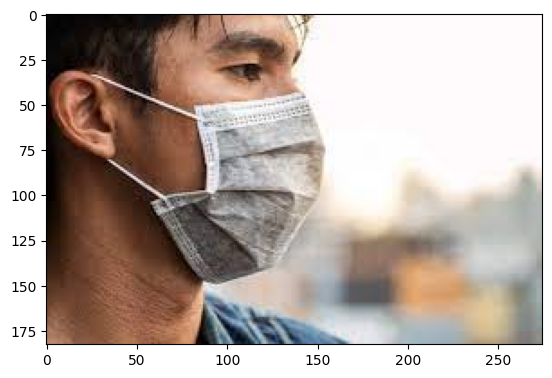

In [29]:
img=cv2.imread('/Users/Dataset/FaceMask/Test dataset/img2.jpeg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [30]:
img=cv2.resize(img, (224,224))
img=img.reshape(1,224,224,3)
pred = model1.predict(img)

2023-07-26 11:48:12.153997: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 359ms/step


In [34]:
print(pred[0][0])

1.0


In [35]:

if pred[0] > 0.5:
    print(f'Picture image {categories[1]}')
else:
    print(f'Picture image {categories[0]}')

Picture image with_mask


In [36]:
def detect_mask(image):
    y_pred = model1.predict_generator(image.reshape(1,224,224,3))
    return y_pred

In [39]:
video = cv2.VideoCapture(0)

In [41]:
while True:
    ret, frame = video.read()
    img = cv2.resize(frame,(224,224))
    y_pre = detect_mask(img)
    print(y_pre)
    cv2.imshow('Video WIndow', frame)
    if cv2.waitKey(1) & 0xFF == ord('x'):
        break
cv2.destroyAllWindows()

/var/folders/c3/mcz1hw4s6qnbldhn0ss67r6r0000gn/T/ipykernel_2522/3739500461.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model1.predict_generator(image.reshape(1,224,224,3))
